# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# 1. Display Basic Statistics using describe()

In [3]:
print("\n=== Basic Statistics ===")
print(df.describe())


=== Basic Statistics ===
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0

# 2. Boxplot by output labels/classes

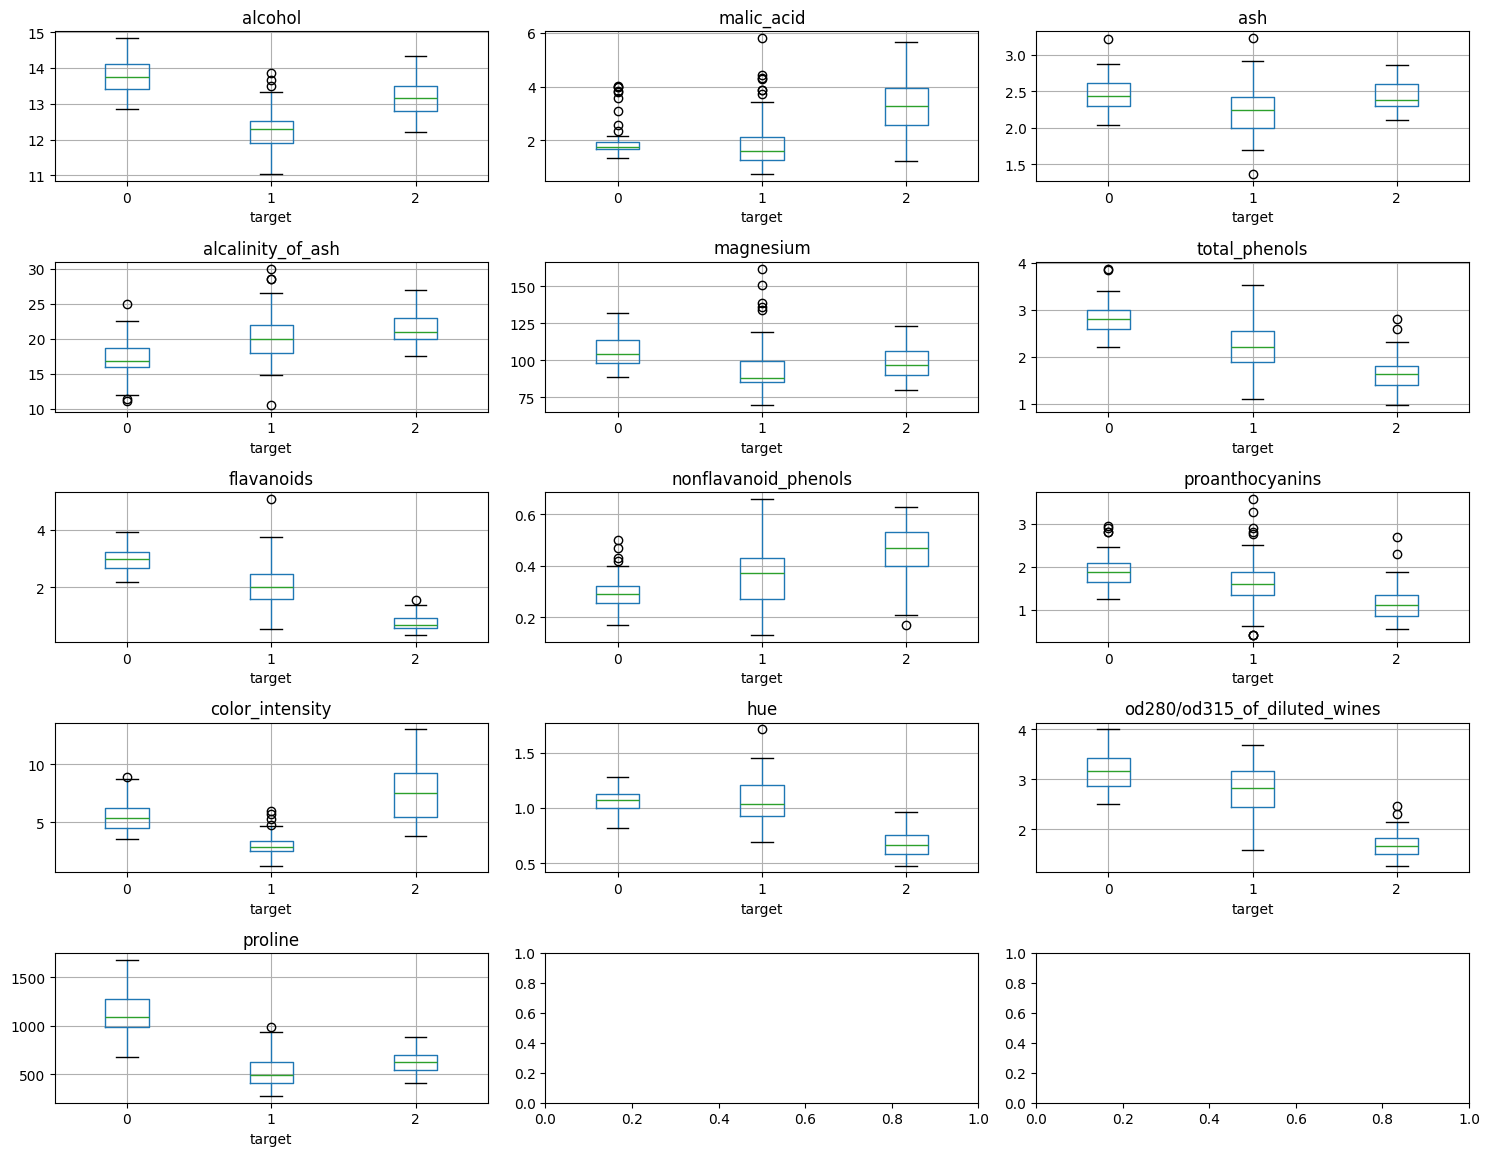

In [4]:
fig, axes = plt.subplots(5, 3, figsize=(15,12))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):
    df.boxplot(column=col, by="target", ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.suptitle("")
plt.show()


# 3. Scatterplot using two variables

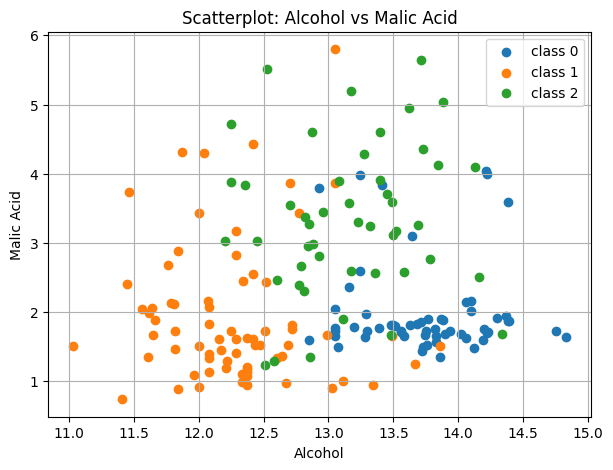

In [5]:
plt.figure(figsize=(7, 5))
for cls in df["target"].unique():
    temp = df[df["target"] == cls]
    plt.scatter(temp["alcohol"], temp["malic_acid"], label=f"class {cls}")

plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.title("Scatterplot: Alcohol vs Malic Acid")
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot Co-Variance Matrix

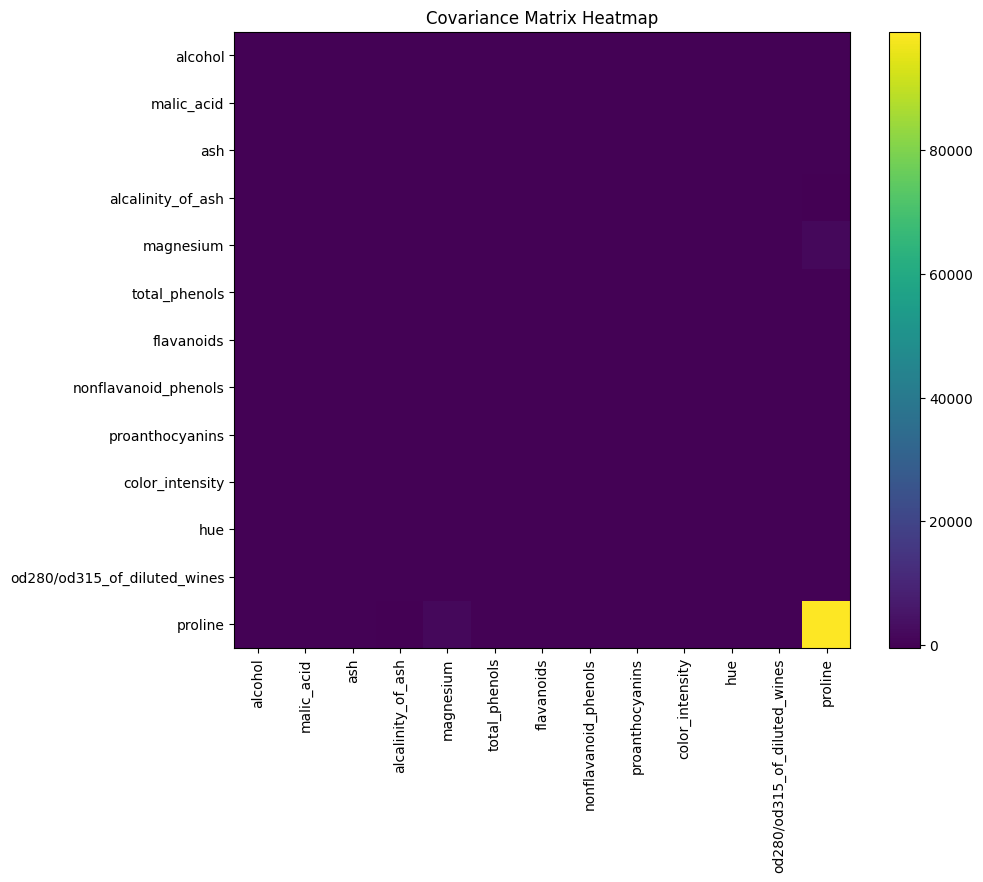

In [6]:
cov_matrix = df[wine.feature_names].cov()

plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap="viridis")
plt.colorbar()
plt.xticks(range(len(wine.feature_names)), wine.feature_names, rotation=90)
plt.yticks(range(len(wine.feature_names)), wine.feature_names)
plt.title("Covariance Matrix Heatmap")
plt.show()

# 5. Data Scaling (Standardization)

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[wine.feature_names])

scaled_df = pd.DataFrame(scaled_data, columns=wine.feature_names)
scaled_df["target"] = df["target"]
print("\n=== Scaled Dataset Statistics ===")
print(scaled_df.describe())



=== Scaled Dataset Statistics ===
            alcohol    malic_acid           ash  alcalinity_of_ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean   7.943708e-15  3.592632e-16 -4.066660e-15      -7.983626e-17   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.432983e+00 -3.679162e+00      -2.671018e+00   
25%   -7.882448e-01 -6.587486e-01 -5.721225e-01      -6.891372e-01   
50%    6.099988e-02 -4.231120e-01 -2.382132e-02       1.518295e-03   
75%    8.361286e-01  6.697929e-01  6.981085e-01       6.020883e-01   
max    2.259772e+00  3.109192e+00  3.156325e+00       3.154511e+00   

          magnesium  total_phenols    flavanoids  nonflavanoid_phenols  \
count  1.780000e+02   1.780000e+02  1.780000e+02          1.780000e+02   
mean  -7.983626e-17  -3.991813e-17  9.979533e-16         -5.588538e-16   
std    1.002821e+00   1.002821e+00  1.002821e+00          1.002821e+00   
min   -2.088255e+00  -2.107246e+00 -1.

# 6. PCA for Better Class Separation


Explained Variance Ratio: [0.36198848 0.1920749 ]


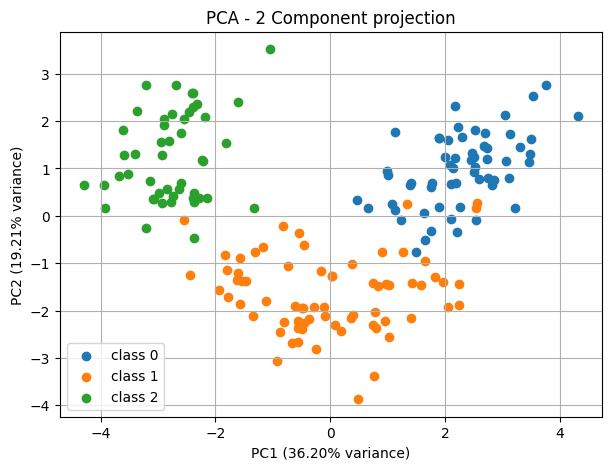

In [8]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
pca_df["target"] = df["target"]

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(7, 5))
for cls in pca_df["target"].unique():
    temp = pca_df[pca_df["target"] == cls]
    plt.scatter(temp["PC1"], temp["PC2"], label=f"class {cls}")

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA - 2 Component projection")
plt.legend()
plt.grid(True)
plt.show()